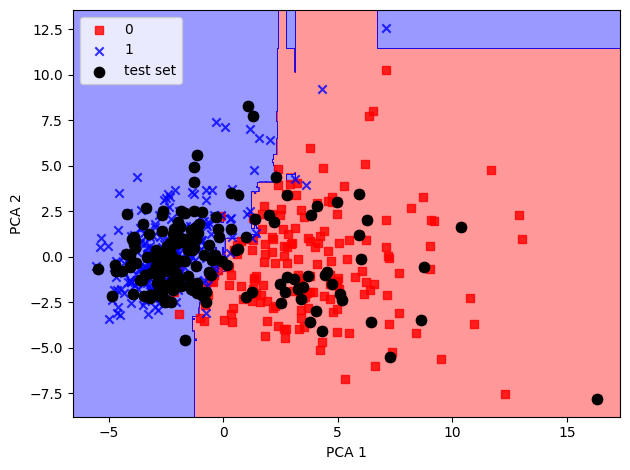

Accuracy after PCA: 0.91
Accuracy per feature after PCA: 0.4561


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Define the plot_decision_regions function
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],  # Prevents warning
            marker=markers[idx],
            label=cl
        )

    # highlight test samples
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='black',  # Set the color to black for test samples
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')

# Load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)

# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model
forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

# Plot decision regions
plot_decision_regions(X_pca, y, classifier=forest, test_idx=range(len(X_train), len(X_pca)))

# Display the plot
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Make predictions
y_pred = forest.predict(X_test)

# Calculate accuracy and accuracy per feature
accuracy = accuracy_score(y_test, y_pred)
accuracy_per_feature = accuracy / X_pca.shape[1]

print('Accuracy after PCA: %.2f' % accuracy)
print('Accuracy per feature after PCA: %.4f' % accuracy_per_feature)
